In [67]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [68]:
import numpy as np
import pandas as pd

In [69]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [70]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData
from sqlalchemy import inspect

In [71]:
# Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [72]:
# reflect an existing database into a new model
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference 
# to those classes called Station and Measurement.
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [83]:
# We can view all of the classes that automap found
Base.classes.keys()

# check table names exists via inspect
ins = inspect(engine)

# for _t in ins.get_table_names():
#     print(_t)

# Collect the names of tables within the database
ins.get_table_names()

['measurement', 'station']

In [74]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference 
# to those classes called Station and Measurement.
# Assign the measurement class to a variable called `Measurement`
# Assign the measurement station to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# Create our session (link) from Python to the DB
session = Session(engine)

first_row_Measurement = session.query(Measurement).first()
first_row_Measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10f916f60>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [85]:
session = Session(engine)
first_row_Station = session.query(Station).first()
first_row_Station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10f91ff60>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [87]:
# Design a query to retrieve the last 12 months of precipitation data.
for instance in session.query(Measurement).order_by(Measurement.id):
    print(instance.date, instance.id, instance.prcp, instance.station, instance.tobs)
    break

2010-01-01 1 0.08 USC00519397 65.0


In [88]:
# Design a query to retrieve the last 12 months of precipitation data.
for instance in session.query(Station).order_by(Station.id):
    print(instance.elevation, instance.id, instance.latitude, instance.longitude, instance.name, instance.station)
    break

3.0 1 21.2716 -157.8168 WAIKIKI 717.2, HI US USC00519397


In [91]:
# Design a query to retrieve the last 12 months of precipitation data.
for instance in session.query(Measurement).order_by(Measurement.date.desc()):
    print(instance.date, instance.id, instance.prcp, instance.station, instance.tobs)
    break

2017-08-23 2724 0.0 USC00519397 81.0


In [106]:
for instance in session.query(Measurement).filter(Measurement.date>='2016-08-23').filter(Measurement.date<='2017-08-23'):
    print(instance.date, instance.prcp)



    

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

2017-07-24 0.58
2017-07-25 0.03
2017-07-26 0.06
2017-07-27 0.0
2017-07-28 0.13
2017-07-29 0.06
2017-07-30 0.0
2017-07-31 0.0
2016-08-23 0.05
2016-08-24 2.28
2016-08-25 0.0
2016-08-26 0.02
2016-08-27 0.02
2016-08-28 0.14
2016-08-29 0.04
2016-08-31 None
2016-09-01 0.0
2016-09-02 0.19
2016-09-05 None
2016-09-06 0.04
2016-09-07 0.23
2016-09-08 0.01
2016-09-09 0.29
2016-09-12 None
2016-09-13 0.32
2016-09-14 1.84
2016-09-15 0.07
2016-09-16 0.07
2016-09-19 None
2016-09-20 0.25
2016-09-21 0.02
2016-09-22 0.17
2016-09-23 0.15
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.02
2016-09-27 0.0
2016-09-28 0.0
2016-09-29 0.2
2016-09-30 0.06
2016-10-01 0.08
2016-10-02 0.03
2016-10-03 0.03
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-10 None
2016-10-11 0.04
2016-10-12 0.0
2016-10-13 0.02
2016-10-14 0.0
2016-10-15 0.02
2016-10-17 None
2016-10-18 0.03
2016-10-19 0.0
2016-10-20 0.01
2016-10-21 0.03
2016-10-23 None
2016-10-24 0.01
2016-10-25 0.0
2016-10-27 0.2
2016-10-28 0.07
2016-10-29 

2017-02-05 0.0
2017-02-06 0.18
2017-02-07 1.32
2017-02-08 0.0
2017-02-09 0.0
2017-02-10 0.0
2017-02-11 1.73
2017-02-12 2.98
2017-02-13 0.01
2017-02-14 0.0
2017-02-15 0.01
2017-02-16 0.73
2017-02-17 0.13
2017-02-18 0.0
2017-02-19 0.09
2017-02-20 0.0
2017-02-21 0.0
2017-02-22 0.06
2017-02-23 0.0
2017-02-24 0.0
2017-02-25 0.0
2017-02-26 0.0
2017-02-27 0.0
2017-02-28 0.04
2017-03-01 2.12
2017-03-02 1.88
2017-03-03 0.27
2017-03-04 0.0
2017-03-05 0.41
2017-03-06 0.03
2017-03-07 0.0
2017-03-08 0.0
2017-03-09 0.65
2017-03-10 0.03
2017-03-11 0.01
2017-03-12 0.0
2017-03-13 0.0
2017-03-14 0.0
2017-03-15 0.06
2017-03-16 0.0
2017-03-17 0.12
2017-03-18 0.0
2017-03-19 0.0
2017-03-20 0.02
2017-03-21 0.09
2017-03-22 0.0
2017-03-23 0.0
2017-03-24 0.12
2017-03-25 0.93
2017-03-26 0.0
2017-03-27 0.01
2017-03-28 0.0
2017-03-29 0.01
2017-03-30 0.04
2017-03-31 0.01
2017-04-01 0.21
2017-04-02 0.0
2017-04-03 0.26
2017-04-04 0.09
2017-04-05 0.1
2017-04-06 0.06
2017-04-07 0.0
2017-04-08 0.0
2017-04-09 0.0
2017-04

In [155]:
conn = engine.connect()

last_year = pd.read_sql("SELECT * from measurement;", conn)
last_year.head()


last_year_data = pd.read_sql("SELECT date,prcp from Measurement where measurement.date>='2016-08-23';", conn)

last_year_data.sort_values(by=['date'])

last_year_data.head()


# last_year_data.dropna()
# last_year_data.set_index('date').head()



# print(len(last_year))

# print(len(last_year_data))
# last_year_data.head()




,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [113]:
print(len(data_frame_census))


19550


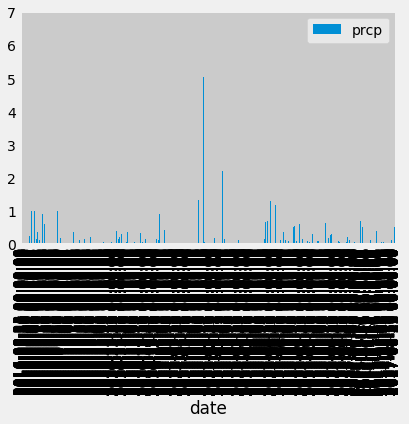

In [190]:
last_month = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>="2016-08-23")

# for instance in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-23'):
# #     print(instance.date, instance.prcp)
    
last_month = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-23').all()
last_month_df = pd.DataFrame(last_month,columns=['date', 'prcp'])  
last_month_df = last_month_df.sort_values(by='date').dropna()
last_month_df = last_month_df.set_index(pd.DatetimeIndex(last_month_df['date']))
last_month_df.head()

last_month_df.plot.bar()
plt.show()
    

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Get the dates for the last 12 months 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc())
print(last_date.limit(1).all())

print(last_date)

[('2017-08-23',)]
SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC


In [15]:
# for instance in session.query(Measurement).order_by('id'):
#     print(instance.date)
    
for instance in session.query(Measurement).order_by(Measurement.date.asc()):
    print(instance.date, instance.prcp)

# for instance in session.query(Measurement).order_by('id'):
#     print(instance.date)


#     _sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x114221240>,
#  'date': '2010-01-01',
#  'id': 1,
#  'prcp': 0.08,
#  'station': 'USC00519397',
#  'tobs': 65.0}

for instance in session.query(Measurement).order_by(Measurement.date.asc()):
    print(instance.date, instance.prcp)


2010-01-01 0.08
2010-01-01 0.28
2010-01-01 0.21
2010-01-01 0.15
2010-01-01 0.15
2010-01-01 0.05
2010-01-01 0.14
2010-01-02 0.0
2010-01-02 0.0
2010-01-02 0.02
2010-01-02 0.0
2010-01-02 0.0
2010-01-02 0.0
2010-01-02 0.0
2010-01-03 0.0
2010-01-03 0.0
2010-01-03 0.0
2010-01-03 0.0
2010-01-03 0.0
2010-01-03 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-04 0.0
2010-01-04 0.01
2010-01-04 0.0
2010-01-04 0.0
2010-01-04 0.0
2010-01-04 0.0
2010-01-05 0.0
2010-01-05 0.02
2010-01-05 0.01
2010-01-05 0.0
2010-01-05 0.0
2010-01-05 0.0
2010-01-06 None
2010-01-06 0.02
2010-01-06 0.11
2010-01-06 0.01
2010-01-06 0.08
2010-01-06 0.36
2010-01-07 0.06
2010-01-07 0.38
2010-01-07 None
2010-01-07 0.7
2010-01-07 0.17
2010-01-07 0.04
2010-01-07 0.3
2010-01-08 0.0
2010-01-08 0.01
2010-01-08 0.03
2010-01-08 0.02
2010-01-08 0.0
2010-01-08 0.0
2010-01-08 0.0
2010-01-09 0.0
2010-01-09 0.0
2010-01-09 0.01
2010-01-09 0.01
2010-01-09 0.0
2010-01-09 0.0
2010-01-09 0.0
2010-01-10 0.0
2010-01-10 0.0
2010-01-10 0.01
2010-01-10 0

2010-04-08 0.1
2010-04-08 0.87
2010-04-08 0.35
2010-04-09 0.01
2010-04-09 0.24
2010-04-09 0.04
2010-04-09 0.8
2010-04-09 0.0
2010-04-09 0.01
2010-04-09 0.01
2010-04-09 0.5
2010-04-10 0.0
2010-04-10 0.03
2010-04-10 0.05
2010-04-10 0.0
2010-04-10 0.14
2010-04-10 0.0
2010-04-10 0.4
2010-04-11 0.01
2010-04-11 0.03
2010-04-11 0.09
2010-04-11 None
2010-04-11 0.01
2010-04-11 0.02
2010-04-11 0.0
2010-04-11 1.04
2010-04-12 0.01
2010-04-12 0.01
2010-04-12 0.0
2010-04-12 0.0
2010-04-12 0.0
2010-04-12 0.01
2010-04-12 0.02
2010-04-13 0.0
2010-04-13 0.06
2010-04-13 0.02
2010-04-13 None
2010-04-13 0.13
2010-04-13 0.02
2010-04-13 0.0
2010-04-13 0.93
2010-04-14 0.07
2010-04-14 0.0
2010-04-14 0.03
2010-04-14 0.02
2010-04-14 0.14
2010-04-14 0.0
2010-04-14 0.0
2010-04-15 0.0
2010-04-15 0.0
2010-04-15 0.0
2010-04-15 0.0
2010-04-15 0.0
2010-04-15 0.0
2010-04-15 0.0
2010-04-16 0.01
2010-04-16 0.03
2010-04-16 0.02
2010-04-16 None
2010-04-16 0.02
2010-04-16 0.0
2010-04-16 0.0
2010-04-16 0.06
2010-04-17 0.0
201

2010-07-12 None
2010-07-12 0.25
2010-07-13 0.0
2010-07-13 0.01
2010-07-13 0.0
2010-07-13 None
2010-07-13 0.0
2010-07-13 0.62
2010-07-13 0.0
2010-07-13 0.0
2010-07-14 0.45
2010-07-14 0.03
2010-07-14 0.0
2010-07-14 0.04
2010-07-14 0.2
2010-07-14 0.01
2010-07-14 0.48
2010-07-15 0.04
2010-07-15 0.13
2010-07-15 0.0
2010-07-15 None
2010-07-15 0.03
2010-07-15 0.14
2010-07-15 0.01
2010-07-15 0.24
2010-07-16 None
2010-07-16 0.02
2010-07-16 0.02
2010-07-16 0.0
2010-07-16 0.04
2010-07-16 0.03
2010-07-16 0.01
2010-07-16 0.0
2010-07-16 0.19
2010-07-17 0.02
2010-07-17 0.04
2010-07-17 0.08
2010-07-17 0.04
2010-07-17 0.02
2010-07-17 0.46
2010-07-18 0.0
2010-07-18 0.05
2010-07-18 None
2010-07-18 0.07
2010-07-18 0.31
2010-07-18 0.0
2010-07-18 2.14
2010-07-19 0.04
2010-07-19 0.12
2010-07-19 0.14
2010-07-19 0.0
2010-07-19 0.0
2010-07-19 0.02
2010-07-19 0.01
2010-07-19 0.35
2010-07-20 0.21
2010-07-20 0.17
2010-07-20 0.07
2010-07-20 0.0
2010-07-20 0.1
2010-07-20 0.02
2010-07-20 1.23
2010-07-21 0.0
2010-07-2

2010-11-13 0.1
2010-11-13 0.0
2010-11-13 0.18
2010-11-13 0.0
2010-11-13 0.21
2010-11-14 0.02
2010-11-14 0.01
2010-11-14 0.0
2010-11-14 0.01
2010-11-14 0.0
2010-11-14 0.31
2010-11-15 0.35
2010-11-15 0.08
2010-11-15 None
2010-11-15 None
2010-11-15 0.03
2010-11-15 0.85
2010-11-15 0.01
2010-11-15 0.6
2010-11-16 0.0
2010-11-16 0.01
2010-11-16 0.0
2010-11-16 0.02
2010-11-16 0.08
2010-11-16 0.0
2010-11-16 0.13
2010-11-16 0.04
2010-11-16 0.62
2010-11-17 0.0
2010-11-17 0.0
2010-11-17 0.0
2010-11-17 0.0
2010-11-17 0.0
2010-11-17 0.0
2010-11-17 0.02
2010-11-17 0.01
2010-11-18 0.0
2010-11-18 0.0
2010-11-18 0.0
2010-11-18 0.0
2010-11-18 0.0
2010-11-18 0.0
2010-11-18 0.0
2010-11-18 0.0
2010-11-19 None
2010-11-19 0.19
2010-11-19 0.16
2010-11-19 0.35
2010-11-19 0.35
2010-11-19 0.13
2010-11-19 0.19
2010-11-19 0.34
2010-11-19 0.22
2010-11-20 0.03
2010-11-20 0.02
2010-11-20 0.01
2010-11-20 0.0
2010-11-20 0.0
2010-11-20 0.0
2010-11-20 0.0
2010-11-21 0.0
2010-11-21 0.0
2010-11-21 0.05
2010-11-21 0.03
2010-

2011-03-22 0.01
2011-03-22 0.85
2011-03-23 0.0
2011-03-23 0.04
2011-03-23 0.0
2011-03-23 0.34
2011-03-23 0.0
2011-03-23 0.17
2011-03-23 0.0
2011-03-23 0.06
2011-03-24 0.06
2011-03-24 0.12
2011-03-24 0.15
2011-03-24 0.39
2011-03-24 0.19
2011-03-24 0.21
2011-03-24 0.0
2011-03-24 1.35
2011-03-25 0.0
2011-03-25 0.07
2011-03-25 0.02
2011-03-25 0.02
2011-03-25 0.0
2011-03-25 0.13
2011-03-26 0.0
2011-03-26 0.02
2011-03-26 None
2011-03-26 0.0
2011-03-26 0.02
2011-03-26 0.0
2011-03-26 0.62
2011-03-27 0.0
2011-03-27 0.04
2011-03-27 0.0
2011-03-27 0.1
2011-03-27 0.04
2011-03-27 0.38
2011-03-28 0.04
2011-03-28 0.08
2011-03-28 None
2011-03-28 0.0
2011-03-28 0.0
2011-03-28 0.26
2011-03-29 0.05
2011-03-29 0.0
2011-03-29 None
2011-03-29 0.0
2011-03-29 0.09
2011-03-29 0.0
2011-03-29 0.11
2011-03-30 0.0
2011-03-30 0.08
2011-03-30 0.0
2011-03-30 0.0
2011-03-30 0.03
2011-03-30 0.0
2011-03-30 0.04
2011-03-30 0.0
2011-03-30 0.18
2011-03-31 0.0
2011-03-31 0.0
2011-03-31 0.0
2011-03-31 0.0
2011-03-31 0.02
201

2011-07-31 0.0
2011-07-31 0.0
2011-07-31 None
2011-08-01 0.0
2011-08-01 0.01
2011-08-01 0.0
2011-08-01 None
2011-08-01 0.0
2011-08-01 0.0
2011-08-01 0.0
2011-08-01 0.0
2011-08-02 0.0
2011-08-02 0.0
2011-08-02 0.03
2011-08-02 None
2011-08-02 0.0
2011-08-02 0.08
2011-08-02 0.01
2011-08-02 0.26
2011-08-03 0.0
2011-08-03 0.02
2011-08-03 0.02
2011-08-03 0.0
2011-08-03 0.0
2011-08-03 0.05
2011-08-03 0.0
2011-08-03 0.17
2011-08-04 0.02
2011-08-04 0.03
2011-08-04 0.01
2011-08-04 None
2011-08-04 0.0
2011-08-04 0.12
2011-08-04 0.0
2011-08-04 0.26
2011-08-05 0.03
2011-08-05 0.04
2011-08-05 0.02
2011-08-05 None
2011-08-05 0.0
2011-08-05 0.07
2011-08-05 0.0
2011-08-05 0.51
2011-08-06 0.01
2011-08-06 0.04
2011-08-06 0.0
2011-08-06 0.02
2011-08-06 0.0
2011-08-06 0.04
2011-08-07 0.0
2011-08-07 0.01
2011-08-07 0.0
2011-08-07 0.12
2011-08-07 0.08
2011-08-07 0.0
2011-08-07 0.18
2011-08-08 0.0
2011-08-08 0.0
2011-08-08 0.0
2011-08-08 None
2011-08-08 0.0
2011-08-08 0.0
2011-08-08 0.0
2011-08-08 0.01
2011-0

2011-11-13 0.01
2011-11-13 0.0
2011-11-13 0.08
2011-11-13 0.0
2011-11-13 0.07
2011-11-14 0.0
2011-11-14 0.0
2011-11-14 None
2011-11-14 None
2011-11-14 0.0
2011-11-14 0.01
2011-11-14 0.0
2011-11-14 0.07
2011-11-15 0.0
2011-11-15 0.0
2011-11-15 0.0
2011-11-15 None
2011-11-15 0.0
2011-11-15 0.0
2011-11-15 0.0
2011-11-15 0.0
2011-11-16 0.0
2011-11-16 0.0
2011-11-16 0.0
2011-11-16 None
2011-11-16 0.0
2011-11-16 0.0
2011-11-16 0.0
2011-11-16 0.0
2011-11-17 0.0
2011-11-17 0.01
2011-11-17 0.0
2011-11-17 0.0
2011-11-17 0.05
2011-11-17 0.01
2011-11-17 0.0
2011-11-17 0.08
2011-11-18 0.0
2011-11-18 0.04
2011-11-18 0.21
2011-11-18 0.0
2011-11-18 0.0
2011-11-18 0.04
2011-11-18 0.0
2011-11-18 0.03
2011-11-19 0.0
2011-11-19 0.03
2011-11-19 0.09
2011-11-19 0.01
2011-11-19 0.26
2011-11-19 0.0
2011-11-19 0.29
2011-11-20 0.0
2011-11-20 0.02
2011-11-20 0.02
2011-11-20 0.06
2011-11-20 0.0
2011-11-20 0.4
2011-11-21 0.01
2011-11-21 0.38
2011-11-21 None
2011-11-21 0.0
2011-11-21 0.0
2011-11-21 0.22
2011-11-21 

2012-03-26 0.11
2012-03-26 0.03
2012-03-26 None
2012-03-26 0.03
2012-03-26 0.1
2012-03-26 0.03
2012-03-26 0.37
2012-03-27 0.03
2012-03-27 0.12
2012-03-27 0.14
2012-03-27 None
2012-03-27 0.02
2012-03-27 0.06
2012-03-27 0.0
2012-03-27 0.57
2012-03-28 0.02
2012-03-28 0.01
2012-03-28 0.0
2012-03-28 None
2012-03-28 0.18
2012-03-28 0.0
2012-03-28 0.0
2012-03-28 0.02
2012-03-29 0.0
2012-03-29 0.0
2012-03-29 0.0
2012-03-29 None
2012-03-29 0.0
2012-03-29 0.0
2012-03-29 0.0
2012-03-29 0.0
2012-03-30 0.0
2012-03-30 0.0
2012-03-30 0.0
2012-03-30 None
2012-03-30 0.0
2012-03-30 0.02
2012-03-30 0.0
2012-03-30 0.0
2012-03-31 0.0
2012-03-31 0.0
2012-03-31 0.0
2012-03-31 0.0
2012-03-31 0.0
2012-03-31 0.0
2012-04-01 0.0
2012-04-01 0.0
2012-04-01 None
2012-04-01 0.0
2012-04-01 0.0
2012-04-01 0.0
2012-04-01 0.04
2012-04-02 0.0
2012-04-02 0.0
2012-04-02 None
2012-04-02 None
2012-04-02 0.0
2012-04-02 0.0
2012-04-02 0.0
2012-04-02 0.0
2012-04-03 0.0
2012-04-03 0.0
2012-04-03 None
2012-04-03 0.0
2012-04-03 0.0

2012-08-11 0.19
2012-08-11 0.11
2012-08-11 0.0
2012-08-11 0.26
2012-08-12 0.0
2012-08-12 0.08
2012-08-12 0.0
2012-08-12 0.07
2012-08-12 0.0
2012-08-12 0.23
2012-08-13 0.0
2012-08-13 0.06
2012-08-13 None
2012-08-13 0.0
2012-08-13 0.01
2012-08-13 0.0
2012-08-13 0.03
2012-08-14 0.0
2012-08-14 0.06
2012-08-14 0.06
2012-08-14 0.09
2012-08-14 0.03
2012-08-14 0.06
2012-08-14 0.26
2012-08-15 0.01
2012-08-15 0.01
2012-08-15 0.01
2012-08-15 0.0
2012-08-15 0.0
2012-08-15 0.0
2012-08-15 0.02
2012-08-16 0.0
2012-08-16 0.0
2012-08-16 0.02
2012-08-16 0.0
2012-08-16 0.01
2012-08-16 0.0
2012-08-16 0.0
2012-08-17 0.0
2012-08-17 0.0
2012-08-17 0.0
2012-08-17 0.0
2012-08-17 0.0
2012-08-17 0.0
2012-08-17 0.24
2012-08-18 None
2012-08-18 0.03
2012-08-18 0.28
2012-08-18 0.0
2012-08-19 None
2012-08-19 None
2012-08-19 0.05
2012-08-19 0.04
2012-08-19 0.0
2012-08-19 None
2012-08-20 0.0
2012-08-20 0.01
2012-08-20 None
2012-08-20 0.0
2012-08-20 0.02
2012-08-20 0.0
2012-08-20 0.38
2012-08-21 0.0
2012-08-21 0.03
2012

2012-12-10 0.12
2012-12-11 0.0
2012-12-11 0.0
2012-12-11 0.0
2012-12-11 0.0
2012-12-11 0.0
2012-12-11 0.0
2012-12-11 0.0
2012-12-11 0.0
2012-12-12 0.0
2012-12-12 0.07
2012-12-12 0.03
2012-12-12 0.0
2012-12-12 0.04
2012-12-12 0.02
2012-12-12 0.0
2012-12-12 0.24
2012-12-13 0.14
2012-12-13 0.1
2012-12-13 0.25
2012-12-13 0.04
2012-12-13 0.13
2012-12-13 0.13
2012-12-13 0.0
2012-12-13 0.44
2012-12-14 0.09
2012-12-14 0.08
2012-12-14 0.22
2012-12-14 0.07
2012-12-14 0.09
2012-12-14 0.25
2012-12-14 0.15
2012-12-14 0.72
2012-12-15 0.01
2012-12-15 0.1
2012-12-15 0.12
2012-12-15 0.21
2012-12-15 0.0
2012-12-15 0.44
2012-12-16 0.02
2012-12-16 0.04
2012-12-16 0.04
2012-12-16 0.08
2012-12-16 0.0
2012-12-16 0.48
2012-12-17 0.02
2012-12-17 0.02
2012-12-17 None
2012-12-17 0.09
2012-12-17 0.14
2012-12-17 0.0
2012-12-17 0.54
2012-12-18 0.12
2012-12-18 0.2
2012-12-18 0.22
2012-12-18 0.22
2012-12-18 0.46
2012-12-18 0.02
2012-12-18 2.25
2012-12-19 0.0
2012-12-19 0.24
2012-12-19 0.29
2012-12-19 0.04
2012-12-19 

2013-04-14 0.01
2013-04-14 0.1
2013-04-14 0.0
2013-04-15 0.8
2013-04-15 0.43
2013-04-15 0.57
2013-04-15 None
2013-04-15 None
2013-04-15 0.44
2013-04-15 0.79
2013-04-15 0.5
2013-04-15 0.83
2013-04-16 0.08
2013-04-16 0.19
2013-04-16 0.07
2013-04-16 None
2013-04-16 0.01
2013-04-16 0.12
2013-04-16 0.1
2013-04-16 0.08
2013-04-17 0.0
2013-04-17 0.0
2013-04-17 0.0
2013-04-17 None
2013-04-17 0.0
2013-04-17 0.0
2013-04-17 0.0
2013-04-17 0.0
2013-04-18 0.0
2013-04-18 0.0
2013-04-18 0.0
2013-04-18 0.0
2013-04-18 0.0
2013-04-18 0.02
2013-04-18 0.0
2013-04-18 0.07
2013-04-19 0.01
2013-04-19 0.03
2013-04-19 0.22
2013-04-19 0.0
2013-04-19 0.01
2013-04-19 0.13
2013-04-19 0.0
2013-04-19 0.57
2013-04-20 0.0
2013-04-20 0.11
2013-04-20 0.05
2013-04-20 0.0
2013-04-20 0.59
2013-04-20 0.01
2013-04-20 1.4
2013-04-21 0.0
2013-04-21 0.0
2013-04-21 0.0
2013-04-21 0.01
2013-04-21 0.0
2013-04-21 0.01
2013-04-22 0.05
2013-04-22 0.44
2013-04-22 None
2013-04-22 None
2013-04-22 0.35
2013-04-22 0.41
2013-04-22 0.87
201

2013-08-30 0.0
2013-08-30 0.04
2013-08-30 0.04
2013-08-30 0.0
2013-08-30 0.04
2013-08-30 0.0
2013-08-30 0.04
2013-08-31 0.0
2013-08-31 0.0
2013-08-31 0.0
2013-08-31 None
2013-08-31 0.19
2013-08-31 0.0
2013-08-31 0.1
2013-09-01 0.02
2013-09-01 0.03
2013-09-01 None
2013-09-01 0.09
2013-09-01 0.06
2013-09-01 0.35
2013-09-01 0.44
2013-09-02 0.0
2013-09-02 0.01
2013-09-02 None
2013-09-02 0.0
2013-09-02 0.0
2013-09-02 0.0
2013-09-02 0.07
2013-09-03 0.0
2013-09-03 0.0
2013-09-03 0.0
2013-09-03 None
2013-09-03 0.05
2013-09-03 0.0
2013-09-03 0.0
2013-09-03 0.13
2013-09-04 0.0
2013-09-04 0.16
2013-09-04 0.01
2013-09-04 0.0
2013-09-04 0.04
2013-09-04 0.0
2013-09-04 0.0
2013-09-04 0.06
2013-09-05 0.0
2013-09-05 0.0
2013-09-05 0.0
2013-09-05 0.0
2013-09-05 None
2013-09-05 0.0
2013-09-05 0.0
2013-09-05 0.0
2013-09-05 0.02
2013-09-06 0.0
2013-09-06 0.0
2013-09-06 0.0
2013-09-06 0.0
2013-09-06 0.01
2013-09-06 0.0
2013-09-06 0.01
2013-09-06 0.0
2013-09-06 0.0
2013-09-07 0.14
2013-09-07 0.55
2013-09-07 

2014-01-11 0.06
2014-01-11 0.09
2014-01-12 0.35
2014-01-12 0.0
2014-01-12 0.0
2014-01-12 0.02
2014-01-12 0.19
2014-01-12 0.02
2014-01-13 0.0
2014-01-13 0.0
2014-01-13 None
2014-01-13 None
2014-01-13 0.0
2014-01-13 0.0
2014-01-13 0.42
2014-01-13 0.0
2014-01-14 0.43
2014-01-14 0.89
2014-01-14 0.59
2014-01-14 0.41
2014-01-14 0.44
2014-01-14 1.76
2014-01-14 0.31
2014-01-14 0.8
2014-01-15 0.01
2014-01-15 0.19
2014-01-15 0.0
2014-01-15 0.28
2014-01-15 0.01
2014-01-15 0.0
2014-01-15 0.01
2014-01-16 0.25
2014-01-16 0.04
2014-01-16 0.01
2014-01-16 0.3
2014-01-16 0.03
2014-01-16 0.02
2014-01-16 0.01
2014-01-17 0.0
2014-01-17 0.0
2014-01-17 0.0
2014-01-17 0.15
2014-01-17 0.06
2014-01-17 0.0
2014-01-17 0.0
2014-01-18 0.0
2014-01-18 0.03
2014-01-18 0.0
2014-01-18 0.13
2014-01-18 0.03
2014-01-18 0.01
2014-01-18 0.01
2014-01-19 0.0
2014-01-19 0.0
2014-01-19 0.0
2014-01-19 0.01
2014-01-19 0.0
2014-01-19 0.0
2014-01-20 0.0
2014-01-20 0.02
2014-01-20 None
2014-01-20 0.17
2014-01-20 0.19
2014-01-20 0.0
2

2014-04-26 0.02
2014-04-26 0.0
2014-04-26 0.03
2014-04-26 0.0
2014-04-26 0.1
2014-04-27 0.01
2014-04-27 0.2
2014-04-27 0.3
2014-04-27 0.68
2014-04-27 0.07
2014-04-27 2.44
2014-04-28 0.07
2014-04-28 0.32
2014-04-28 None
2014-04-28 None
2014-04-28 0.04
2014-04-28 0.42
2014-04-28 0.15
2014-04-28 1.06
2014-04-29 0.0
2014-04-29 0.0
2014-04-29 0.0
2014-04-29 None
2014-04-29 0.0
2014-04-29 0.01
2014-04-29 0.02
2014-04-29 0.09
2014-04-30 0.0
2014-04-30 0.21
2014-04-30 0.22
2014-04-30 0.0
2014-04-30 0.22
2014-05-01 0.0
2014-05-01 0.02
2014-05-01 0.0
2014-05-01 0.0
2014-05-01 0.06
2014-05-01 0.0
2014-05-01 0.52
2014-05-02 0.0
2014-05-02 0.57
2014-05-02 0.09
2014-05-02 0.0
2014-05-02 0.09
2014-05-02 0.36
2014-05-02 0.0
2014-05-02 0.15
2014-05-03 0.0
2014-05-03 0.3
2014-05-03 0.01
2014-05-03 0.03
2014-05-03 0.57
2014-05-03 0.06
2014-05-03 1.14
2014-05-04 0.0
2014-05-04 0.01
2014-05-04 0.0
2014-05-04 0.0
2014-05-04 0.03
2014-05-04 0.0
2014-05-04 0.0
2014-05-05 0.06
2014-05-05 0.02
2014-05-05 0.0
20

2014-09-13 0.0
2014-09-13 0.0
2014-09-13 0.0
2014-09-14 0.0
2014-09-14 0.0
2014-09-14 0.0
2014-09-14 0.0
2014-09-14 0.0
2014-09-14 0.0
2014-09-15 0.01
2014-09-15 0.36
2014-09-15 None
2014-09-15 None
2014-09-15 0.3
2014-09-15 0.53
2014-09-15 0.01
2014-09-15 0.19
2014-09-16 0.0
2014-09-16 0.0
2014-09-16 0.0
2014-09-16 None
2014-09-16 0.0
2014-09-16 0.0
2014-09-16 0.01
2014-09-17 0.0
2014-09-17 0.02
2014-09-17 0.09
2014-09-17 None
2014-09-17 0.19
2014-09-17 0.47
2014-09-17 None
2014-09-18 0.0
2014-09-18 0.2
2014-09-18 0.0
2014-09-18 0.39
2014-09-18 0.04
2014-09-18 0.02
2014-09-19 0.04
2014-09-19 0.13
2014-09-19 0.12
2014-09-19 0.18
2014-09-19 0.54
2014-09-19 0.0
2014-09-20 0.05
2014-09-20 0.23
2014-09-20 0.14
2014-09-20 0.0
2014-09-20 0.02
2014-09-21 0.01
2014-09-21 0.0
2014-09-21 None
2014-09-21 1.21
2014-09-21 0.0
2014-09-21 0.01
2014-09-22 0.0
2014-09-22 0.01
2014-09-22 0.0
2014-09-22 0.06
2014-09-22 0.0
2014-09-22 0.08
2014-09-23 0.0
2014-09-23 0.03
2014-09-23 0.02
2014-09-23 0.01
201

2015-02-02 None
2015-02-02 None
2015-02-02 0.0
2015-02-02 0.0
2015-02-02 None
2015-02-03 0.0
2015-02-03 0.0
2015-02-03 0.05
2015-02-03 0.03
2015-02-03 0.0
2015-02-03 0.0
2015-02-03 0.03
2015-02-04 0.01
2015-02-04 0.77
2015-02-04 0.17
2015-02-04 0.16
2015-02-04 None
2015-02-04 1.29
2015-02-04 0.1
2015-02-05 0.19
2015-02-05 0.0
2015-02-05 0.02
2015-02-05 None
2015-02-05 0.05
2015-02-05 0.0
2015-02-05 None
2015-02-05 0.03
2015-02-06 0.0
2015-02-06 0.0
2015-02-06 0.0
2015-02-06 None
2015-02-06 0.0
2015-02-06 0.0
2015-02-06 0.0
2015-02-06 0.0
2015-02-07 0.0
2015-02-07 0.0
2015-02-07 0.0
2015-02-07 0.0
2015-02-07 0.0
2015-02-07 0.0
2015-02-08 0.0
2015-02-08 0.0
2015-02-08 0.0
2015-02-08 0.0
2015-02-08 0.0
2015-02-08 0.0
2015-02-09 0.0
2015-02-09 0.0
2015-02-09 None
2015-02-09 0.0
2015-02-09 0.0
2015-02-09 0.0
2015-02-10 0.1
2015-02-10 0.1
2015-02-10 0.02
2015-02-10 0.1
2015-02-10 0.15
2015-02-10 0.24
2015-02-10 0.08
2015-02-10 None
2015-02-11 0.0
2015-02-11 0.0
2015-02-11 0.0
2015-02-11 0.0


2015-05-25 0.0
2015-05-26 0.0
2015-05-26 0.08
2015-05-26 0.06
2015-05-26 0.0
2015-05-26 0.0
2015-05-26 0.07
2015-05-26 None
2015-05-26 0.04
2015-05-27 0.0
2015-05-27 0.07
2015-05-27 0.05
2015-05-27 0.13
2015-05-27 0.36
2015-05-27 0.0
2015-05-27 0.03
2015-05-28 0.0
2015-05-28 1.29
2015-05-28 0.64
2015-05-28 0.0
2015-05-28 0.68
2015-05-28 0.72
2015-05-28 0.0
2015-05-28 0.03
2015-05-29 0.0
2015-05-29 0.01
2015-05-29 0.0
2015-05-29 0.0
2015-05-29 0.04
2015-05-29 0.0
2015-05-29 0.0
2015-05-30 0.0
2015-05-30 0.0
2015-05-30 0.14
2015-05-30 0.01
2015-05-30 0.01
2015-05-30 0.01
2015-05-31 0.0
2015-05-31 0.34
2015-05-31 0.0
2015-05-31 0.59
2015-05-31 1.12
2015-06-01 0.0
2015-06-01 0.05
2015-06-01 0.13
2015-06-01 0.46
2015-06-01 0.01
2015-06-01 2.47
2015-06-02 0.0
2015-06-02 0.0
2015-06-02 0.02
2015-06-02 0.0
2015-06-02 0.27
2015-06-03 0.0
2015-06-03 None
2015-06-03 0.0
2015-06-03 0.0
2015-06-03 0.0
2015-06-03 0.0
2015-06-03 0.01
2015-06-04 0.0
2015-06-04 0.27
2015-06-04 0.22
2015-06-04 0.07
2015

2015-10-24 0.01
2015-10-24 0.04
2015-10-25 0.0
2015-10-25 0.03
2015-10-25 0.0
2015-10-25 0.0
2015-10-25 0.0
2015-10-25 0.0
2015-10-25 0.0
2015-10-26 0.0
2015-10-26 0.04
2015-10-26 0.02
2015-10-26 None
2015-10-26 None
2015-10-26 0.01
2015-10-26 0.01
2015-10-26 0.1
2015-10-26 0.01
2015-10-27 0.11
2015-10-27 0.06
2015-10-27 0.09
2015-10-27 None
2015-10-27 None
2015-10-27 0.33
2015-10-27 0.16
2015-10-27 2.0
2015-10-28 0.01
2015-10-28 0.27
2015-10-28 0.01
2015-10-28 None
2015-10-28 0.0
2015-10-28 0.0
2015-10-28 0.0
2015-10-28 0.22
2015-10-29 0.0
2015-10-29 0.02
2015-10-29 1.05
2015-10-29 None
2015-10-29 None
2015-10-29 0.64
2015-10-29 0.07
2015-10-29 0.0
2015-10-29 0.02
2015-10-30 0.0
2015-10-30 0.02
2015-10-30 0.0
2015-10-30 None
2015-10-30 0.11
2015-10-30 0.0
2015-10-30 0.0
2015-10-30 0.0
2015-10-31 0.0
2015-10-31 0.22
2015-10-31 0.09
2015-10-31 0.04
2015-10-31 0.38
2015-10-31 2.45
2015-11-01 0.19
2015-11-01 0.33
2015-11-01 0.05
2015-11-01 0.17
2015-11-01 0.78
2015-11-01 1.2
2015-11-02 0.

2016-03-31 0.0
2016-03-31 None
2016-03-31 0.01
2016-03-31 0.0
2016-03-31 0.0
2016-04-01 0.0
2016-04-01 0.0
2016-04-01 0.0
2016-04-01 0.0
2016-04-01 0.0
2016-04-01 0.0
2016-04-01 0.02
2016-04-02 0.0
2016-04-02 0.02
2016-04-02 0.0
2016-04-02 0.0
2016-04-02 0.0
2016-04-02 0.0
2016-04-03 0.0
2016-04-03 0.0
2016-04-03 0.0
2016-04-03 0.0
2016-04-03 0.0
2016-04-03 0.0
2016-04-04 0.0
2016-04-04 0.0
2016-04-04 0.0
2016-04-04 0.0
2016-04-04 0.0
2016-04-04 0.0
2016-04-04 0.29
2016-04-05 0.0
2016-04-05 0.2
2016-04-05 0.04
2016-04-05 0.04
2016-04-05 0.01
2016-04-05 0.0
2016-04-06 0.01
2016-04-06 0.1
2016-04-06 0.08
2016-04-06 None
2016-04-06 None
2016-04-06 0.34
2016-04-06 0.73
2016-04-07 0.0
2016-04-07 0.12
2016-04-07 0.06
2016-04-07 None
2016-04-07 0.0
2016-04-07 0.43
2016-04-07 0.56
2016-04-08 0.0
2016-04-08 0.02
2016-04-08 0.0
2016-04-08 0.0
2016-04-08 0.0
2016-04-08 1.26
2016-04-08 0.29
2016-04-09 0.0
2016-04-09 0.66
2016-04-09 0.14
2016-04-09 0.0
2016-04-09 0.27
2016-04-09 0.14
2016-04-10 0.0

2016-07-27 0.04
2016-07-28 0.0
2016-07-28 0.0
2016-07-28 0.05
2016-07-28 0.0
2016-07-28 0.0
2016-07-28 0.0
2016-07-29 0.0
2016-07-29 0.0
2016-07-29 0.01
2016-07-29 0.0
2016-07-29 0.0
2016-07-29 0.05
2016-07-30 0.0
2016-07-30 0.03
2016-07-30 0.08
2016-07-30 0.01
2016-07-30 0.4
2016-07-31 0.06
2016-07-31 0.05
2016-07-31 0.79
2016-07-31 0.12
2016-07-31 2.9
2016-08-01 0.08
2016-08-01 2.35
2016-08-01 None
2016-08-01 0.54
2016-08-01 3.53
2016-08-01 2.21
2016-08-02 0.05
2016-08-02 0.2
2016-08-02 0.55
2016-08-02 0.0
2016-08-02 0.07
2016-08-02 0.83
2016-08-02 1.14
2016-08-03 0.0
2016-08-03 0.02
2016-08-03 0.0
2016-08-03 0.02
2016-08-03 0.0
2016-08-03 0.01
2016-08-03 None
2016-08-04 0.04
2016-08-04 0.62
2016-08-04 0.13
2016-08-04 0.25
2016-08-04 0.77
2016-08-04 None
2016-08-05 0.01
2016-08-05 0.03
2016-08-05 0.03
2016-08-05 0.0
2016-08-05 0.27
2016-08-05 None
2016-08-06 0.0
2016-08-06 0.07
2016-08-06 None
2016-08-06 0.04
2016-08-06 0.14
2016-08-06 None
2016-08-07 0.39
2016-08-07 0.3
2016-08-07 0

2017-01-01 0.0
2017-01-01 None
2017-01-01 0.03
2017-01-01 0.03
2017-01-02 0.0
2017-01-02 0.0
2017-01-02 0.01
2017-01-02 0.01
2017-01-02 0.0
2017-01-03 0.0
2017-01-03 0.0
2017-01-03 0.0
2017-01-03 None
2017-01-03 0.0
2017-01-03 0.0
2017-01-04 0.0
2017-01-04 0.0
2017-01-04 0.0
2017-01-04 0.18
2017-01-04 0.0
2017-01-04 0.0
2017-01-05 0.0
2017-01-05 0.0
2017-01-05 0.0
2017-01-05 0.42
2017-01-05 0.06
2017-01-05 0.47
2017-01-06 0.0
2017-01-06 0.0
2017-01-06 0.59
2017-01-06 0.01
2017-01-06 0.1
2017-01-06 0.1
2017-01-07 0.0
2017-01-07 0.06
2017-01-07 0.0
2017-01-07 0.0
2017-01-07 0.0
2017-01-07 0.0
2017-01-08 0.0
2017-01-08 0.0
2017-01-08 0.03
2017-01-08 0.0
2017-01-08 0.0
2017-01-08 0.03
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 None
2017-01-09 0.0
2017-01-09 0.0
2017-01-09 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 None
2017-01-10 0.0
2017-01-10 0.0
2017-01-10 0.0
2017-01-11 0.0
2017-01-11 0.0
2017-01-11 0.0
2017-01-11 None
2017-01-11 0.0
2017-01-11 0.0
2017-01

2017-06-13 0.03
2017-06-13 0.24
2017-06-13 0.65
2017-06-14 0.0
2017-06-14 0.27
2017-06-14 0.21
2017-06-14 None
2017-06-14 0.06
2017-06-14 0.22
2017-06-14 0.81
2017-06-15 0.0
2017-06-15 0.17
2017-06-15 0.3
2017-06-15 None
2017-06-15 0.0
2017-06-15 0.55
2017-06-15 1.69
2017-06-16 0.0
2017-06-16 0.02
2017-06-16 0.02
2017-06-16 None
2017-06-16 0.0
2017-06-16 0.06
2017-06-16 0.1
2017-06-17 0.0
2017-06-17 0.35
2017-06-17 0.02
2017-06-17 0.0
2017-06-17 0.07
2017-06-17 0.1
2017-06-18 0.05
2017-06-18 0.25
2017-06-18 0.18
2017-06-18 0.0
2017-06-18 0.24
2017-06-18 0.7
2017-06-19 0.0
2017-06-19 0.05
2017-06-19 0.19
2017-06-19 None
2017-06-19 0.01
2017-06-19 0.08
2017-06-19 0.4
2017-06-20 0.02
2017-06-20 0.05
2017-06-20 0.17
2017-06-20 None
2017-06-20 0.0
2017-06-20 0.31
2017-06-21 0.0
2017-06-21 0.02
2017-06-21 None
2017-06-21 None
2017-06-21 0.19
2017-06-21 0.3
2017-06-22 0.0
2017-06-22 0.1
2017-06-22 0.0
2017-06-22 0.0
2017-06-22 0.06
2017-06-22 0.28
2017-06-23 0.0
2017-06-23 0.0
2017-06-23 None

In [66]:
# for instance in session.query(Measurement).order_by(Measurement.date.desc()):
#     print(instance.date)

print(str(len(Measurement)))
    
    


TypeError: object of type 'DeclarativeMeta' has no len()

In [32]:
# for instance in session.query(Measurement).filter(Measurement.date.in_(['2017-08-23':'2016-08-23'])).all():
#     print(instance.date, instance.prcp)

# for instance in session.query(Measurement).filter(Measurement.date.in_(['2010-01-06'])).all():
#     print(instance.date, instance.prcp)
    
#     .like('%ed%')

for instance in session.query(Measurement).filter(Measurement.date.like('2010%')).all():
    print(instance.date, instance.prcp)
    

2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-06 None
2010-01-07 0.06
2010-01-08 0.0
2010-01-09 0.0
2010-01-10 0.0
2010-01-11 0.01
2010-01-12 0.0
2010-01-14 0.0
2010-01-15 0.0
2010-01-16 0.0
2010-01-17 0.0
2010-01-18 0.0
2010-01-19 0.0
2010-01-20 0.0
2010-01-21 0.0
2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.01
2010-01-25 0.0
2010-01-26 0.04
2010-01-27 0.12
2010-01-28 0.0
2010-01-30 None
2010-01-31 0.03
2010-02-01 0.01
2010-02-03 None
2010-02-04 0.01
2010-02-05 0.0
2010-02-06 0.0
2010-02-07 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-11 0.0
2010-02-12 0.02
2010-02-13 0.01
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.0
2010-02-19 None
2010-02-20 0.03
2010-02-21 0.0
2010-02-22 0.0
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-28 0.0
2010-03-01 0.01
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.12
2010-03-05 0.08
2010-03-06 0.03
2010-03-07 0.0
2010-03-08 0.43
2010-03-09 0.06
2010-03-11 None
2010-03-12 0.0
2010-03-13 0.0
2010-03-14 0.0
20

2010-06-04 0.0
2010-06-05 0.0
2010-06-06 0.0
2010-06-07 0.09
2010-06-08 0.0
2010-06-09 0.0
2010-06-10 0.0
2010-06-11 0.0
2010-06-12 0.03
2010-06-13 0.0
2010-06-14 0.06
2010-06-15 0.03
2010-06-16 0.0
2010-06-17 0.0
2010-06-18 0.03
2010-06-19 0.04
2010-06-20 0.0
2010-06-21 0.0
2010-06-22 0.0
2010-06-23 0.0
2010-06-24 0.05
2010-06-25 0.12
2010-06-27 None
2010-06-28 0.18
2010-06-29 0.06
2010-06-30 0.03
2010-07-01 0.02
2010-07-02 0.32
2010-07-03 0.16
2010-07-04 0.08
2010-07-05 0.0
2010-07-06 0.15
2010-07-07 0.09
2010-07-08 0.14
2010-07-09 0.01
2010-07-10 0.06
2010-07-12 0.0
2010-07-13 0.0
2010-07-14 0.03
2010-07-15 0.13
2010-07-16 0.02
2010-07-18 None
2010-07-19 0.14
2010-07-20 0.17
2010-07-21 0.0
2010-07-22 0.11
2010-07-23 0.07
2010-07-26 0.0
2010-07-27 0.43
2010-07-28 0.03
2010-07-29 0.0
2010-07-30 0.06
2010-07-31 0.01
2010-08-01 0.25
2010-08-02 0.11
2010-08-03 0.04
2010-08-04 0.05
2010-08-05 0.29
2010-08-06 0.0
2010-08-07 0.09
2010-08-08 0.07
2010-08-09 0.04
2010-08-10 0.0
2010-08-11 0.0

2010-03-04 0.4
2010-03-05 0.33
2010-03-06 0.51
2010-03-07 0.08
2010-03-08 0.53
2010-03-09 0.04
2010-03-10 0.45
2010-03-11 0.01
2010-03-12 0.12
2010-03-13 0.0
2010-03-14 0.0
2010-03-15 0.23
2010-03-16 0.5
2010-03-17 0.19
2010-03-18 0.69
2010-03-19 0.19
2010-03-20 0.0
2010-03-21 0.05
2010-03-22 0.0
2010-03-23 0.0
2010-03-24 0.02
2010-03-25 0.06
2010-03-26 0.12
2010-03-27 0.0
2010-03-28 0.0
2010-03-29 0.01
2010-03-30 0.03
2010-03-31 0.0
2010-04-01 0.03
2010-04-02 0.11
2010-04-03 0.18
2010-04-04 0.11
2010-04-05 0.57
2010-04-06 0.16
2010-04-07 3.99
2010-04-08 0.1
2010-04-09 0.01
2010-04-10 0.14
2010-04-11 0.02
2010-04-12 0.0
2010-04-13 0.02
2010-04-14 0.14
2010-04-15 0.0
2010-04-16 0.0
2010-04-17 0.03
2010-04-18 0.0
2010-04-19 0.0
2010-04-20 0.02
2010-04-21 0.13
2010-04-22 0.02
2010-04-23 0.18
2010-04-24 0.0
2010-04-25 0.0
2010-04-26 0.0
2010-04-27 0.0
2010-04-28 0.04
2010-04-29 0.07
2010-04-30 0.17
2010-05-01 0.39
2010-05-02 0.11
2010-05-03 1.06
2010-05-04 0.11
2010-05-05 0.0
2010-05-06 0.

2010-12-27 0.02
2010-12-28 0.04
2010-12-29 0.19
2010-12-30 0.3
2010-12-31 0.01


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Get the dates for the last 12 months 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc())

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [28]:
# Design a query to show how many stations are available in this dataset?


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [35]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [39]:
# Plot the daily normals as an area plot with `stacked=False`
